In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('./summary.csv')
d.head()

,run,step,train/loss,online_val/loss,online_val/physionet2019_score,online_val/average_precision,online_val/auroc,online_val/balanced_accuracy,validation/loss,validation/physionet2019_score,...,online_val/best_average_precision,online_val/best_auroc,online_val/best_balanced_accuracy,validation/best_loss,validation/best_physionet2019_score,validation/best_average_precision,validation/best_auroc,validation/best_balanced_accuracy,loss,epoch
0,without_timepoints_long/1,0,inf,inf,-inf,-inf,-inf,-inf,inf,-inf,...,-inf,-inf,-inf,inf,-inf,-inf,-inf,-inf,NaN,NaN
1,without_timepoints_long/1,99,1.914849,1.805363,-0.797679,0.062876,0.771088,0.575772,NaN,NaN,...,0.062876,0.771088,0.575772,NaN,NaN,NaN,NaN,NaN,1.441324,0.0
2,without_timepoints_long/1,199,1.749169,1.763164,-0.177383,0.069646,0.797064,0.697740,NaN,NaN,...,0.069646,0.797064,0.697740,NaN,NaN,NaN,NaN,NaN,0.803400,1.0
3,without_timepoints_long/1,299,1.686812,1.675592,-0.458544,0.076466,0.811407,0.651631,NaN,NaN,...,0.076466,0.811407,NaN,NaN,NaN,NaN,NaN,NaN,1.009623,2.0
4,without_timepoints_long/1,399,1.661073,1.644332,-0.499742,0.081677,0.822129,0.648403,NaN,NaN,...,0.081677,0.822129,NaN,NaN,NaN,NaN,NaN,NaN,1.679476,3.0


In [3]:
def is_best(colname):
    fragments = colname.split('/')
    if len(fragments) == 1:
        return False
    if fragments[1].startswith('best'):
        return True
    return False

d['repetition'] = d['run'].str.split('/').apply(lambda a: int(a[1]))
d['run'] = d['run'].str.split('/').apply(lambda a: a[0])
d['online_val/log_loss'] = np.log(d['online_val/loss'])
d = d[[col for col in d.columns if not is_best(col) and not col.startswith('validation')]]
d.head()

,run,step,train/loss,online_val/loss,online_val/physionet2019_score,online_val/average_precision,online_val/auroc,online_val/balanced_accuracy,loss,epoch,repetition,online_val/log_loss
0,without_timepoints_long,0,inf,inf,-inf,-inf,-inf,-inf,NaN,NaN,1,inf
1,without_timepoints_long,99,1.914849,1.805363,-0.797679,0.062876,0.771088,0.575772,1.441324,0.0,1,0.590762
2,without_timepoints_long,199,1.749169,1.763164,-0.177383,0.069646,0.797064,0.697740,0.803400,1.0,1,0.567110
3,without_timepoints_long,299,1.686812,1.675592,-0.458544,0.076466,0.811407,0.651631,1.009623,2.0,1,0.516167
4,without_timepoints_long,399,1.661073,1.644332,-0.499742,0.081677,0.822129,0.648403,1.679476,3.0,1,0.497334


In [4]:
d.groupby(['run', 'epoch']).std()

step  train/loss  online_val/loss  \
run                     epoch                                           
forward_fill            0.0    27.386128    0.017267         0.007265   
                        1.0    27.386128    0.006877         0.007279   
                        2.0    27.386128    0.009854         0.082524   
                        3.0    27.386128    0.017124         0.069724   
                        4.0    27.386128    0.000344         0.014416   
...                                  ...         ...              ...   
without_timepoints_long 56.0   27.386128    0.188453         2.985757   
                        57.0   27.386128    0.068214         0.313658   
                        58.0   26.862082    0.062846         2.174372   
                        59.0   27.571725    0.087728         2.497823   
                        60.0   29.160476         NaN              NaN   

                               online_val/physionet2019_score  \
run                     epoch                                   
forward_fill            0.0                          0.224499   
                        1.0                          0.051587   
                        2.0                          0.518871   
                        3.0                          0.312653   
                        4.0                          0.100841   
...                                                       ...   
without_timepoints_long 56.0                         0.035419   
                        57.0                         0.061273   
                        58.0                         0.021551   
                        59.0                         0.056430   
                        60.0                              NaN   

                               online_val/average_precision  online_val/auroc  \
run                     epoch                                                   
forward_fill            0.0                        0.001843          0.000333   
                        1.0                        0.004524          0.003187   
                        2.0                        0.004677          0.004229   
                        3.0                        0.002897          0.001270   
                        4.0                        0.002176          0.002901   
...                                                     ...               ...   
without_timepoints_long 56.0                       0.008441          0.005753   
                        57.0                       0.007067          0.015246   
                        58.0                       0.002577          0.005189   
                        59.0                       0.004566          0.013624   
                        60.0                            NaN               NaN   

                               online_val/balanced_accuracy      loss  \
run                     epoch                                           
forward_fill            0.0                        0.036942  0.525562   
                        1.0                        0.007896  0.834551   
                        2.0                        0.097946  0.437023   
                        3.0                        0.063825  0.507177   
                        4.0                        0.015528  0.128306   
...                                                     ...       ...   
without_timepoints_long 56.0                       0.030180  0.131282   
                        57.0                       0.016789  0.098253   
                        58.0                       0.010874  0.128205   
                        59.0                       0.003855  0.038580   
                        60.0                            NaN  0.039603   

                               repetition  online_val/log_loss  
run                     epoch                                   
forward_fill            0.0      0.894427             0.004129  
                        1.0      0.894427

In [5]:
melted = d.melt(id_vars=['run', 'repetition', 'epoch'], value_vars=['train/loss','online_val/log_loss','online_val/physionet2019_score','online_val/average_precision','online_val/auroc','online_val/balanced_accuracy'])
melted.head()

,run,repetition,epoch,variable,value
0,without_timepoints_long,1,NaN,train/loss,inf
1,without_timepoints_long,1,0.0,train/loss,1.914849
2,without_timepoints_long,1,1.0,train/loss,1.749169
3,without_timepoints_long,1,2.0,train/loss,1.686812
4,without_timepoints_long,1,3.0,train/loss,1.661073


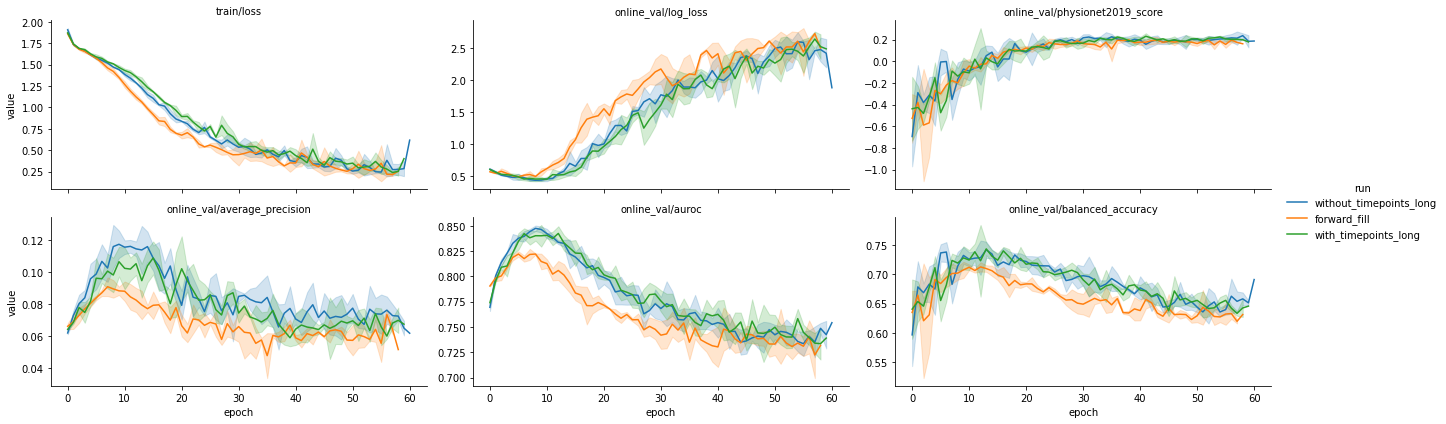

In [7]:
g = sns.FacetGrid(data=melted, col='variable', hue='run', col_wrap=3, sharey=False, aspect=2.)
g.map(sns.lineplot, 'epoch', 'value', ci='sd')
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.add_legend()

plt.savefig('visualization.pdf', bbox_inches='tight')
plt.savefig('visualization.png', dpi=300, bbox_inches='tight')